# Tek bir YSA hücresi : Lojistik Regresyon

[Tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=&seed=0.24138&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)
 ile oynamayı unutmayın!! :)

### Elimizdeki veri matrisimiz: 

$$
X = 
\begin{bmatrix}
& \dots & \dots &   \\
\\
x_{i0}       &  x_{i1}       & x_{i2} & x_{i3} \\
\\
& \dots & \dots &   \\
\end{bmatrix}
$$

$X$ matrisi başlangıçta $n \times m$ boyutlu, 
 - n örnek sayısı
 - m öznitelik sayısı
 

### Parametreler

$$
w = 
\begin{bmatrix}
w_0\\
w_1\\
w_2\\
w_3\\
\end{bmatrix}
$$

$w$ vektörü $m \times 1$ boyutlu, 

### Çıktı vektörü

$$
y = 
\begin{bmatrix}
\\
\\
y_{i} \\
\\
\\
\end{bmatrix}
$$

$w$ vektörü $n \times 1$ boyutlu, 


# Makine öğrenmesi: 
Bir çeşit optimizasyon problemidir. Amacımız (hatayı minimize eden) en iyi parametreleri bulmak. 

![](resim/hucre.png)


### Ağırlık toplam 
hangi öznıtelik ne kadar önemli
$$
z =
Xw = 
\begin{bmatrix}
\vdots\\
x_{i0} w_0 + x_{i1}w_1 + x_{i2}w_2 + x_{i3}w_3\\
\vdots\\
\end{bmatrix}
=
\begin{bmatrix}
\vdots\\
z_i\\
\vdots\\
\end{bmatrix}
$$

### Tahmin
$$
a = \sigma(z) = \sigma(Xw)
=
\begin{bmatrix}
\vdots\\
\sigma(z_i)\\
\vdots\\
\end{bmatrix}
$$


### Hata
$$
H = \frac{1}{2n} \sum^n_{i=1} (y_i - a_i)^2
$$


### Optimizasyon: En iyi parametreleri bulmak


Toplam hata, tüm bireysel hataların, $\frac{dH}{da_k} = \frac{1}{n}(a_k - y_k)$, toplamıdır.
$$
\frac{dH}{da} = \sum^n_{i=1} \frac{dH}{da_i} 
$$

$ a = \sigma(z)$ olduğu için, 

$$
\frac{da_i}{dz_i} = \sigma'(z_i)
$$

$z_i = x_{i0} w_0 + x_{i1}w_1 + x_{i2}w_2 + x_{i3}w_3$ olduğu için,

$$
\frac{dz_i}{dw_j} = x_{ij}
$$

#### Gradyan iniş
![](resim/gradyan.png)

Zincir kuralı yardımı ile, hatanın parametrelerimize göre türevini bulalım.

$$
\frac{dH}{dw_j} = \sum^n_{i=1} \frac{dH}{da_i}  \frac{da_i}{dz_i} \frac{dz_i}{dw_j} 
= \frac{1}{n} \sum^n_{i=1} (a_i - y_i) x_{ij} \sigma'(z_i)
$$

bu durumda 

$$
\frac{dH}{dw} 
= 
\frac{1}{n} X  (y-a) \sigma'(z)
$$

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import timeit
import random

In [2]:
 class yapay_sinir_hucresi():
    def __init__(self,X_train, y_train):
        self.n, self.m = X_train.shape
        self.m += 1 # Add one for x_0 column 
        
        self.X_train = np.hstack((np.ones((self.n,1)), X_train))
        self.y_train = y_train.reshape((self.n,1))
        self.W = np.random.randn(self.m,1)
        
        self.H = []
            
    def hata(self):
        z = self.X_train.dot(self.W)
        a = self.sigmoid(z)
        return np.sum(np.power(a-self.y_train,2))/ (2*self.n)

    def derivative(self):
        z = self.X_train.dot(self.W)
        a = self.sigmoid(z)
        derivative = np.sum(self.X_train * (a - self.y_train) * self.sigmoid_turevi(z) , axis=0)/ self.n
        return derivative.reshape(self.W.shape)

    def gradient_descent(self, alpha = 0.05, number_steps = 10000):
        for i in range(number_steps):
            self.W = self.W - alpha * self.derivative()
            if  i % 1000 == 0: print(self.W)
            self.H.append(self.hata())
        
        return self.W
    
    def predict(self, X_test, threshold=0.5):
        n, m = X_test.shape
        X_test = np.hstack((np.ones((n,1)), X_test))
        a = self.sigmoid(X_test.dot(self.W)) 
        p = a >= threshold
        return (p.astype('int'))

    def fit(self):
        self.W = self.gradient_descent()
        
    #### Yardimci Fonksiyonlar
    def sigmoid(self,z):
        return 1.0/(1.0+np.exp(-z))
    def sigmoid_turevi(self,z):
        return self.sigmoid(z)*(1-self.sigmoid(z))

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

# Importing the dataset from the url
url =  "https://raw.githubusercontent.com/uzay00/KaVe/master/Ders3/data/Social_Network_Ads.csv"
data = pd.read_csv(url)
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

# Split dataset into train ab=nd test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/3, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[79  6]
 [11 38]]


In [5]:
X_train.shape

(266, 2)

In [6]:
me = yapay_sinir_hucresi(X_train, y_train)
me.fit()
me_pred = me.predict(X_test)

cm = confusion_matrix(y_test, me_pred)
print(cm)

[[-0.1452279 ]
 [-1.71129569]
 [-0.54775801]]
[[-0.61483477]
 [ 0.84309087]
 [ 0.55179725]]
[[-0.68306632]
 [ 1.39488498]
 [ 0.70751988]]
[[-0.74719889]
 [ 1.64877791]
 [ 0.82095885]]
[[-0.79122938]
 [ 1.81640014]
 [ 0.90333327]]
[[-0.82338259]
 [ 1.94154426]
 [ 0.96543599]]
[[-0.84835166]
 [ 2.04068661]
 [ 1.01413285]]
[[-0.86858764]
 [ 2.12204414]
 [ 1.05354252]]
[[-0.88546999]
 [ 2.19040193]
 [ 1.08621853]]
[[-0.89984407]
 [ 2.24882539]
 [ 1.11382098]]
[[78  7]
 [ 9 40]]


In [7]:
X_train.shape

(266, 2)

In [8]:
np.sum(X_train, axis=0)

array([-7.14983628e-14,  1.31006317e-14])

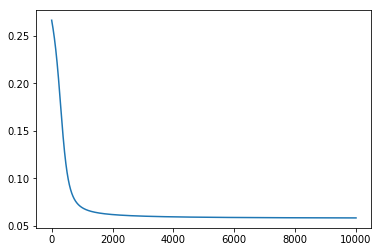

In [9]:
import matplotlib.pyplot as plt
plt.plot(me.H)